In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
adult = pd.read_csv('../data/adult/full/adult_clean.csv')
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33.0,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39.0,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38.0,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44.0,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [5]:
print("The number of adults with salary: {0}")
print(adult['income'].value_counts())
adult_poor = adult.loc[adult['income'] == '<=50K']
adult_rich = adult.loc[adult['income'] == '>50K']

The number of adults with salary: {0}
<=50K    34014
>50K     11208
Name: income, dtype: int64


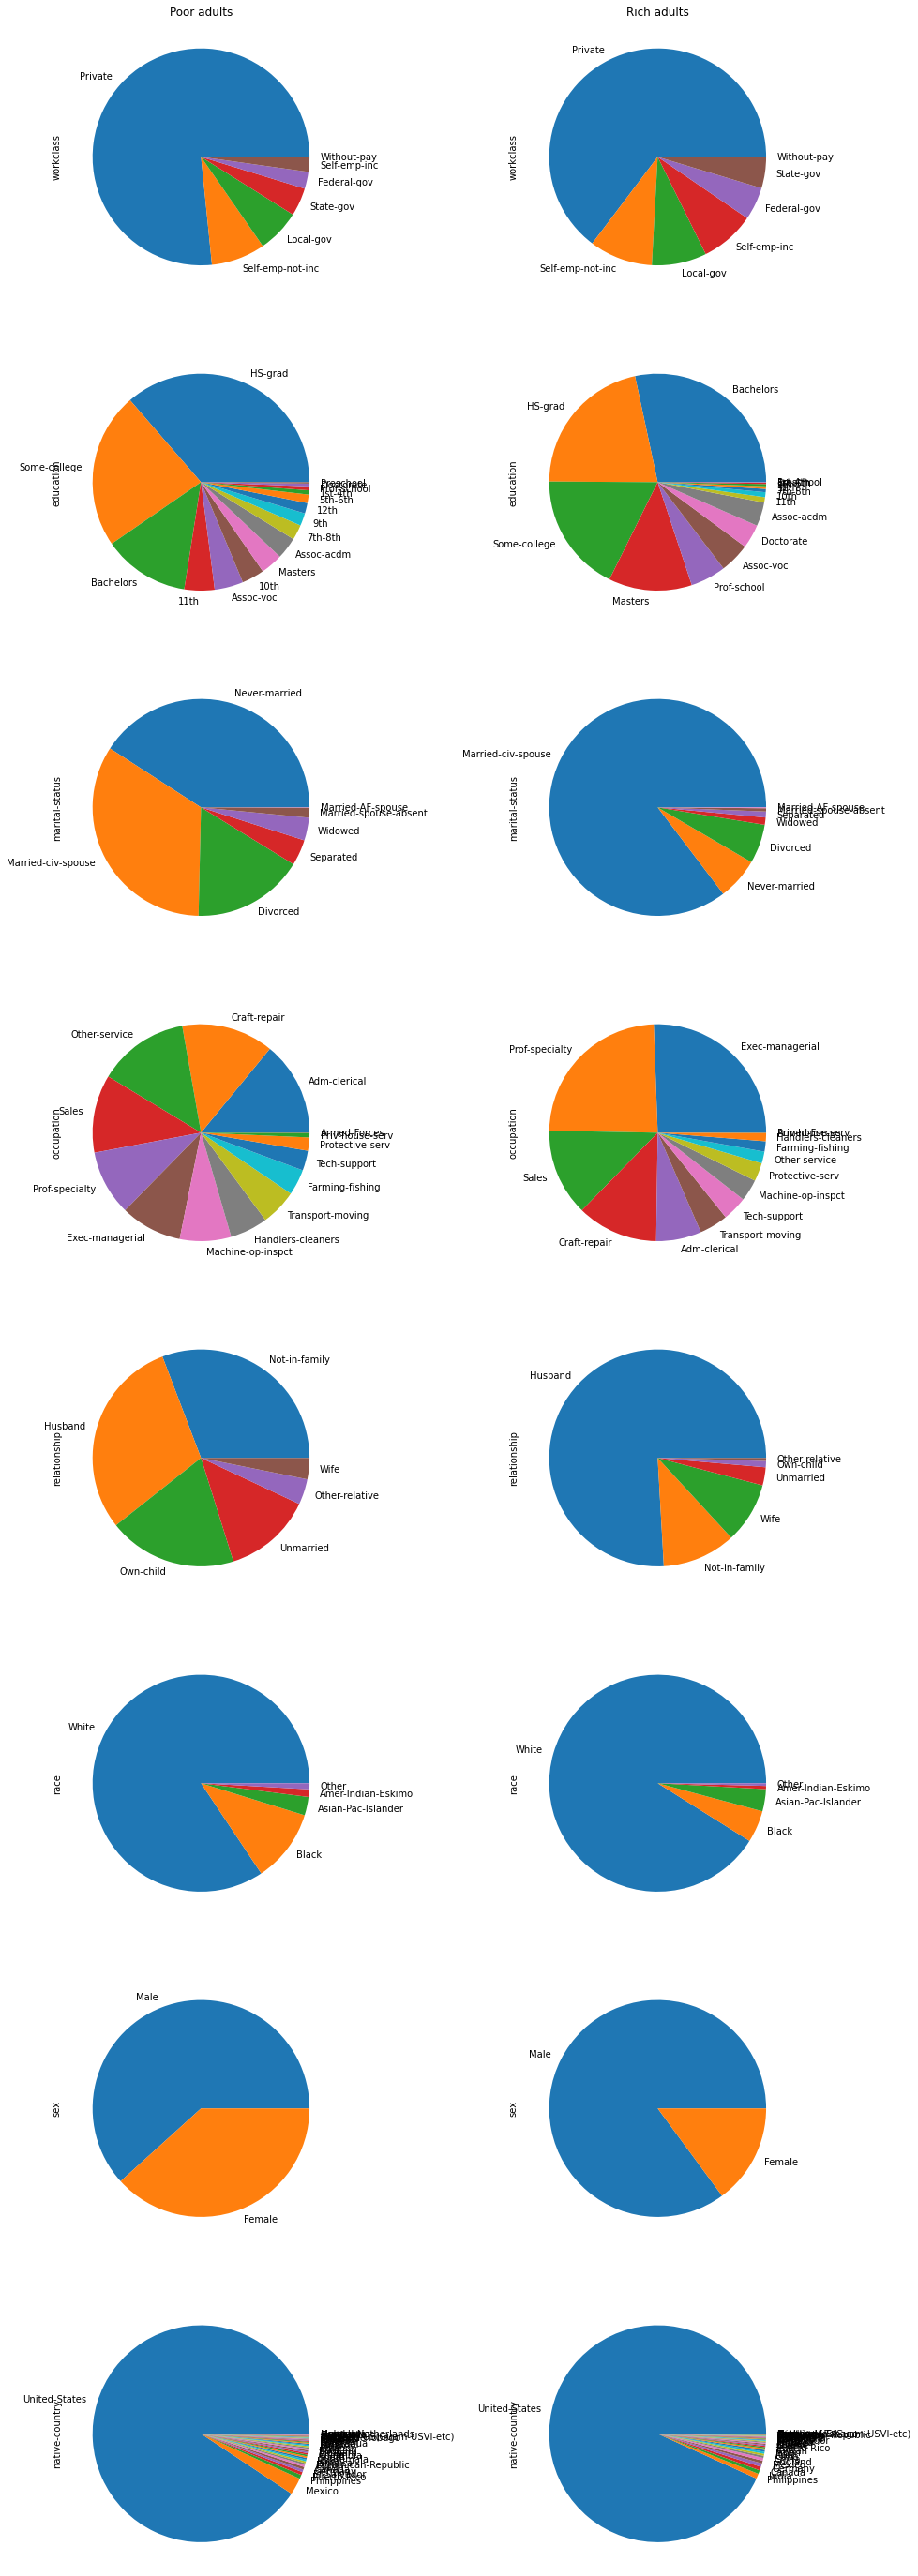

In [93]:
fig, axs = plt.subplots(8, 2, figsize=(16,50))
axs[0, 0].set_title("Poor adults")
axs[0, 1].set_title("Rich adults")
category_columns = adult.select_dtypes(include=['object']).columns.drop('income')
for i, column in enumerate(category_columns):
    adult_poor[column].value_counts().plot.pie(ax=axs[i, 0])
    adult_rich[column].value_counts().plot.pie(ax=axs[i, 1])

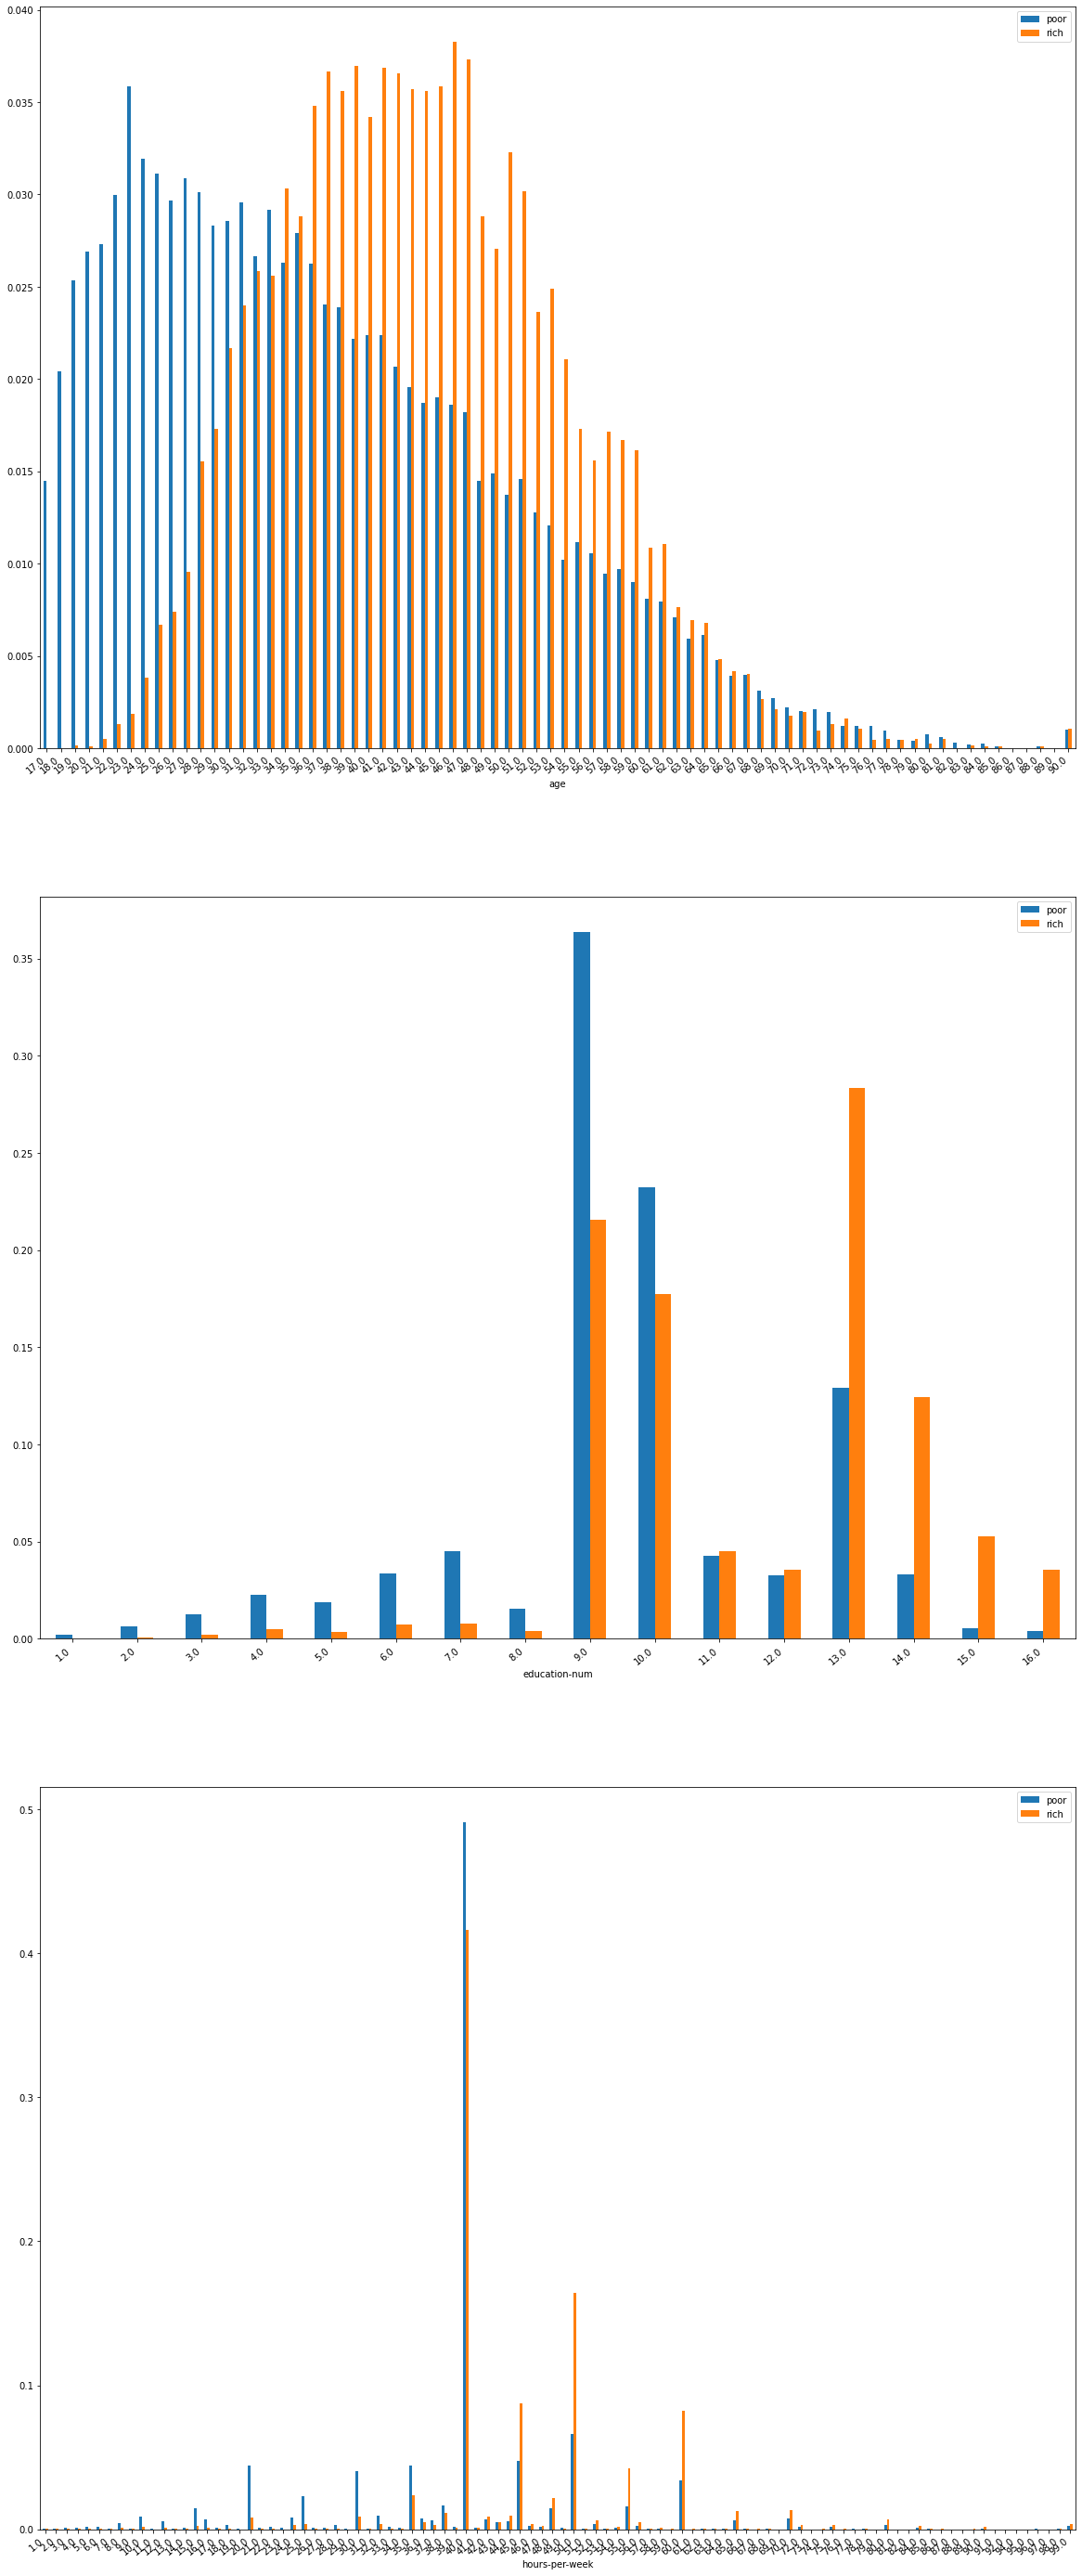

In [144]:
fig, axs = plt.subplots(3, 1, figsize=(20,50))
for i, column in enumerate(['age', 'education-num', 'hours-per-week']):
    poor = (adult_poor[column].value_counts()/len(adult_poor)).sort_index()
    rich = (adult_rich[column].value_counts()/len(adult_rich)).sort_index()
    df = pd.DataFrame({'poor': poor, 'rich': rich})
    df.plot.bar(rot=0, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=40, ha="right")
    axs[i].set_xlabel(column)

## Adult ir 50

In [3]:
adult_50 = np.load('../data/adult/ir50/adult_ir50.tra.npz')
adult_50_x = adult_50['X']
adult_50_y = adult_50['y']

In [6]:
from sklearn.model_selection import train_test_split
X_train1, X_train2, y_train1, y_test2 = train_test_split(X, y, test_size=0.33, random_state=42)

435

In [10]:
adult_50_minority = adult_50_x[(adult_50_y==1).flatten()]
np.savez('../data/adult/ir50/adult_ir50.minority.npz', X=adult_50_minority, y=np.ones(adult_50_minority.shape[0]))

In [16]:
noise = np.random.normal(np.zeros(adult_50_minority.shape[1]), 0.5*adult_50_minority.std(axis=0), size=(adult_50_minority.shape[0], adult_50_minority.shape[1]))
noise

array([[ 0.12343569,  0.01345229,  0.00181616, ..., -0.02071121,
        -0.03917834,  0.05598565],
       [ 0.05465446,  0.00998155,  0.03458479, ...,  0.00606169,
        -0.07684704,  0.02489536],
       [ 0.0644625 , -0.02206362,  0.00185911, ..., -0.02581294,
        -0.04496514, -0.03501956],
       ...,
       [-0.04439793,  0.02891036,  0.09060123, ..., -0.01276948,
         0.05735728,  0.00524812],
       [-0.00756223,  0.06178715, -0.01092362, ..., -0.0536882 ,
         0.02384785,  0.01059407],
       [ 0.1724871 , -0.0352856 , -0.02725384, ...,  0.07432172,
        -0.04099858, -0.01535125]])

In [17]:
adult_50_synth = adult_50_minority + noise
np.savez('../data/adult/ir50/adult_ir50.synth.npz', X=adult_50_synth, y=np.ones(adult_50_synth.shape[0]))

In [18]:
adult_50_synth = np.load('../data/adult/ir50/adult_ir50.synth.npz')
adult_50_synth_x = adult_50_synth['X']
adult_50_synth_y = adult_50_synth['y']

In [19]:
adult_50_synth_x[1,:]

array([ 0.23273665,  0.14009595,  0.76791813, -0.07339079, -0.03116925,
        0.50961615,  0.17588844,  0.58092438,  0.17118133,  0.50434699,
        0.26941177,  0.49195361,  0.03672901,  0.24259734])

In [20]:
adult_50_minority[1,:]

array([0.17808219, 0.1301144 , 0.73333333, 0.        , 0.        ,
       0.5       , 0.26410086, 0.4542389 , 0.17241379, 0.47911096,
       0.26237051, 0.48589192, 0.11357605, 0.21770198])

## Visualize Hold out

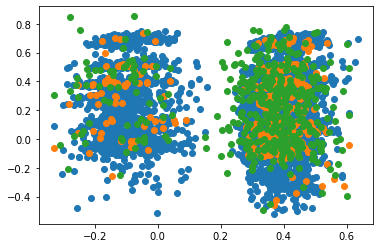

In [44]:
from sklearn.decomposition import PCA
adult_50_hout = np.load('../data/adult/ir50/adult_ir50.hout.npz')
X_hout = adult_50_hout['X']
y_hout = adult_50_hout['y']
pca = PCA(n_components=2)
pca.fit(adult_50_x)
x_pca = pca.transform(adult_50_x)
x_pca_hout = pca.transform(X_hout)
x_pca_synth = pca.transform(adult_50_synth_x)
plt.scatter(x_pca_hout[:, 0], x_pca_hout[:, 1])
plt.scatter(x_pca[(adult_50_y==1.).flatten()][:, 0], x_pca[(adult_50_y==1.).flatten()][:, 1])
plt.scatter(x_pca_synth[:, 0], x_pca_synth[:, 1])


In [37]:
x_pca[(adult_50_y==1.).flatten()]

array([[ 0.35161603,  0.29894269],
       [ 0.32122451,  0.23967455],
       [ 0.44113168, -0.00817261],
       [ 0.34073545,  0.28862484],
       [-0.10407764,  0.3673745 ],
       [ 0.41453639,  0.48850496],
       [-0.14587516, -0.25592385],
       [ 0.44934191,  0.43649567],
       [ 0.31628799,  0.35716182],
       [-0.20548655,  0.05524042],
       [ 0.34466398,  0.36172324],
       [ 0.38966526,  0.37526688],
       [ 0.38034788, -0.0171973 ],
       [ 0.36143441, -0.05487162],
       [ 0.41060289,  0.04266816],
       [-0.09892256,  0.39087186],
       [ 0.32697677,  0.04083933],
       [ 0.38244642,  0.50655626],
       [ 0.39525889, -0.0390371 ],
       [ 0.37530803,  0.51499895],
       [ 0.36698676,  0.28409075],
       [ 0.45736835, -0.03394182],
       [ 0.35675614,  0.12149983],
       [ 0.33901044,  0.68701383],
       [ 0.47580485, -0.08789188],
       [ 0.33455254,  0.28832859],
       [ 0.44182963,  0.51062765],
       [ 0.41309115, -0.10012398],
       [ 0.41342007,